# Visualizing Bootstrap Demo

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from datascience import *
import numpy as np
import ipywidgets as widgets
import traitlets
import matplotlib.pyplot as plt
%matplotlib inline

## Fetch Data

array([  15571.87,   22604.15,  113561.12, ...,   21853.94,   51950.12,
        124241.  ])

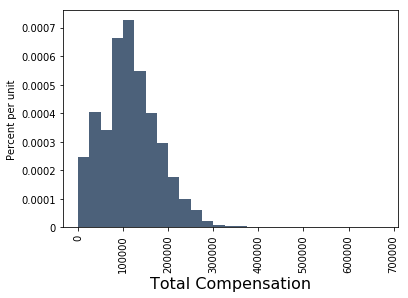

In [18]:
sf2017 = Table.read_table('data/sf2017.csv')
sf2017 = sf2017.where('Salaries', are.above(10000))
sf_bins = np.arange(0, 700000, 25000)
sf2017.select('Total Compensation').hist(bins=sf_bins)
sf2017.column('Total Compensation')

## Sampling/Bootstrapping

#### Sample Size: 500

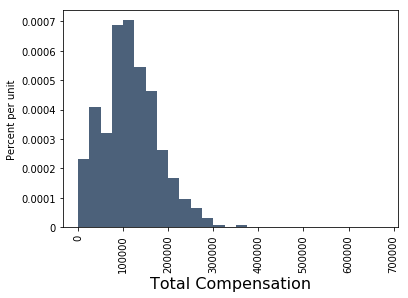

In [3]:
our_sample = sf2017.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins=sf_bins)

In [4]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = percentile(50, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)

    return medians

In [5]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 5000)

## Bootstrap Demo

In [23]:
style = {'description_width': 'initial'}

def generate_samples(sample_size, resample_size):
    
    
    sample = sf2017.sample(sample_size, with_replacement=False)
    bstrap_medians = bootstrap_median(sample, 'Total Compensation', resample_size)
    resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
    
    play = widgets.Play(
    interval=1000,
    value=1,
    min=50,
    max=1000,
    step=50,
    description="Press play",
    disabled=False
    )
    
    def plot_histo(n, resampled_medians, sample_size):
        fig, axes = plt.subplots(nrows=1, ncols=3)
        print('Number of resamples: %s' %n)
        histo_values = resampled_medians.take(np.arange(n)).column('Bootstrap Sample Median')
        ax0, ax1, ax2= axes.flatten()
        ax0.hist(sf2017.column('Total Compensation'))
        ax0.set_title('Original Distribution')
        ax1.hist(np.random.choice(sample.column('Total Compensation'), sample_size))
        ax1.set_title('Resample Distribution')
        ax2.hist(histo_values)
        ax2.set_title('Bootstrap Distribution')
        

    play_button = interactive(plot_histo, n=play, resampled_medians=fixed(resampled_medians), sample_size=fixed(sample_size))
    display(play_button)
    
sample_size_slider = widgets.IntSlider(description='Sample Size',value=1, max=1000, min=1, style=style, continuous_update=False) 
# resample_size_slider = widgets.IntSlider(description='Resample Size',value=1, max=1000, min=1, style=style) 
final_widget = interactive(generate_samples, sample_size=sample_size_slider, resample_size=fixed(1000))

display(final_widget)

A Jupyter Widget